#**Financial Analytics**

###**Step 1: Introduction**
- **Overview:** This project aims to analyze financial data to understand the relationship between market capitalization and quarterly sales of companies. It includes data preprocessing, exploratory data analysis (EDA), feature engineering, storage in an SQLite database, machine learning model development for prediction, and visualization of results.

- **Objectives:** The main objective is to build a predictive model to estimate market capitalization based on quarterly sales data, providing actionable insights for financial decision-making.

###**Step 2: Tools and Technologies**

- **Programming Languages:** Python, SQL
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- **Software/Platforms:** Jupyter Notebook, SQLite for data storage

###**Step 3: Data Collection**

- **Data Sources:** The dataset includes financial data such as market capitalization and quarterly sales, sourced from a CSV file.

- **Data Description:** Detailed information about columns like company name, market capitalization, and quarterly sales.

###**Step 4: Data Loading and Preprocessing**

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/sample_data/Financial Analytics data .csv'
data = pd.read_csv(file_path)
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [ ]:
# Basic data preprocessing
data.dropna(inplace=True)

# Strip whitespace from column names
data.columns = [col.strip() for col in data.columns]
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

###**Step 5: Exploratory Data Analysis (EDA)**

- Summary statistics, distribution plots, and correlation analysis:

In [ ]:
# Summary statistics
summary_stats = data.describe()
summary_stats

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27526.654836,3581.506844
std,145.884078,59033.540015,9729.282622
min,1.000000,0.000000,0.000000
25%,122.750000,4643.832500,459.357500
50%,252.500000,9460.155000,982.300000
75%,378.250000,23400.815000,2580.797500
max,500.000000,583436.720000,110666.930000


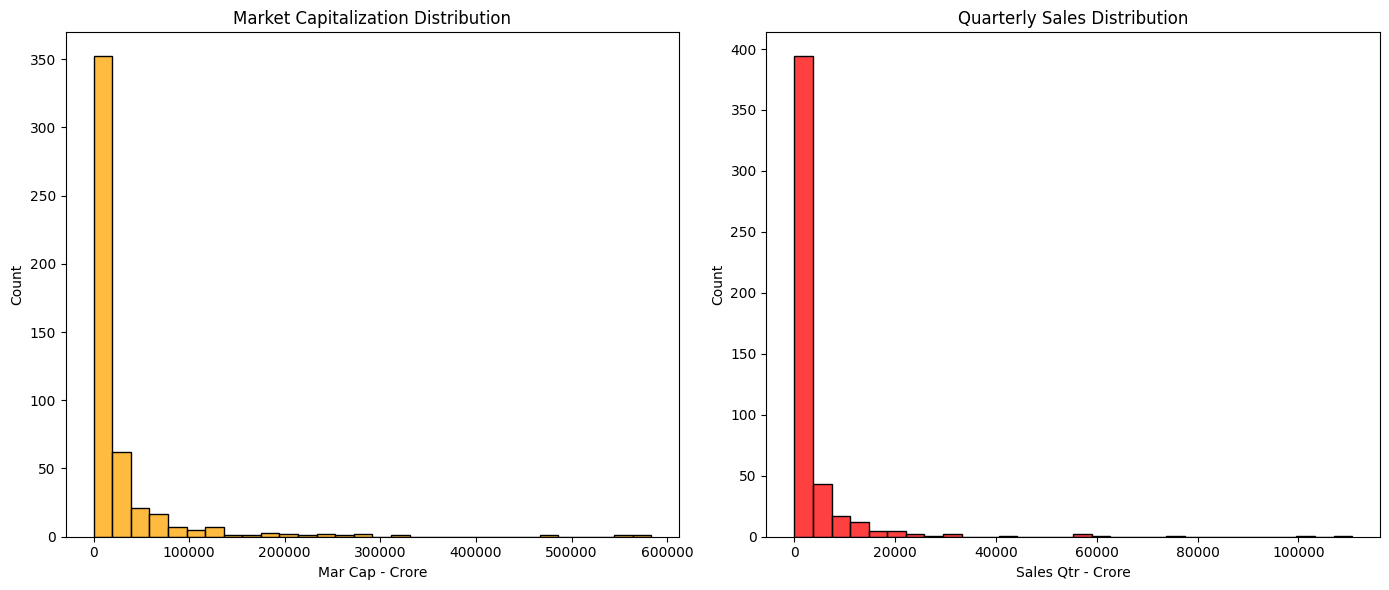

In [ ]:

# Distribution plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Mar Cap - Crore'], bins=30, color='orange')
plt.title('Market Capitalization Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Sales Qtr - Crore'], bins=30, color='red')
plt.title('Quarterly Sales Distribution')

plt.tight_layout()
plt.show()

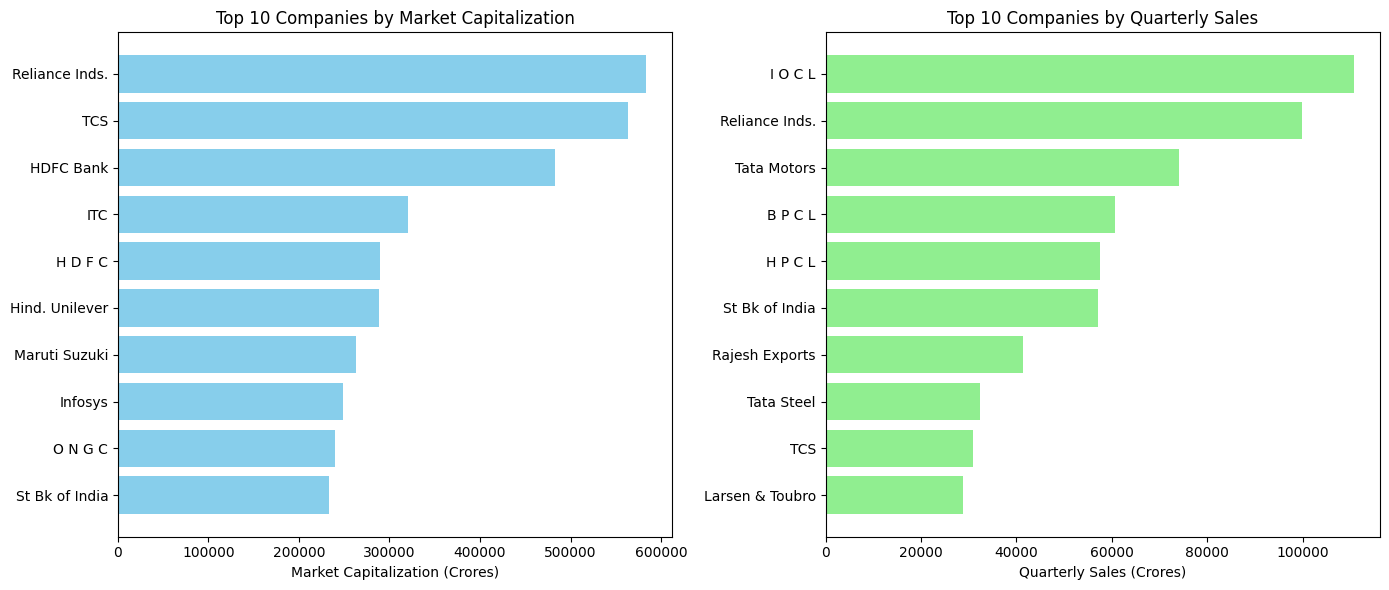

In [ ]:
# Top 10 companies by market capitalization
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore']]

# Top 10 companies by quarterly sales
top_10_sales = data.nlargest(10, 'Sales Qtr - Crore')[['Name', 'Sales Qtr - Crore']]

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(top_10_market_cap['Name'], top_10_market_cap['Mar Cap - Crore'], color='skyblue')
plt.xlabel('Market Capitalization (Crores)')
plt.title('Top 10 Companies by Market Capitalization')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top_10_sales['Name'], top_10_sales['Sales Qtr - Crore'], color='lightgreen')
plt.xlabel('Quarterly Sales (Crores)')
plt.title('Top 10 Companies by Quarterly Sales')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

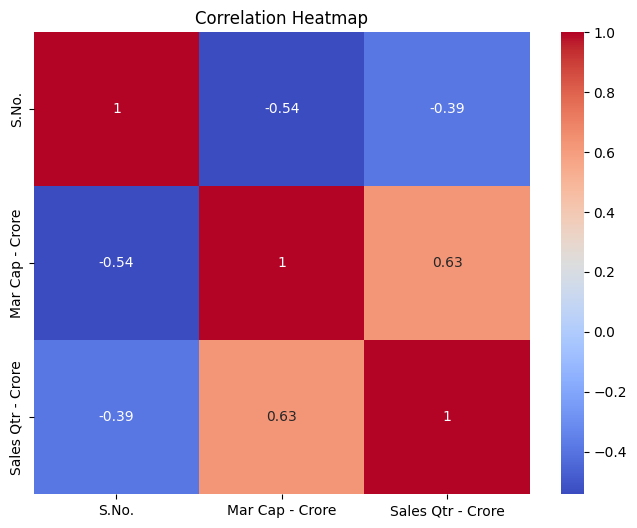

In [ ]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###**Step 6: Additional Visualizations**

- **Pairplot:** To visualize the relationships between multiple pairs of features.

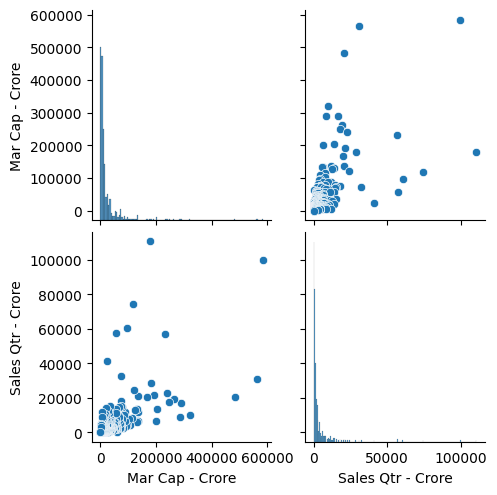

In [ ]:
sns.pairplot(data[['Mar Cap - Crore', 'Sales Qtr - Crore']])
plt.show()

- **Box Plots:** To visualize the distribution of data and detect outliers.

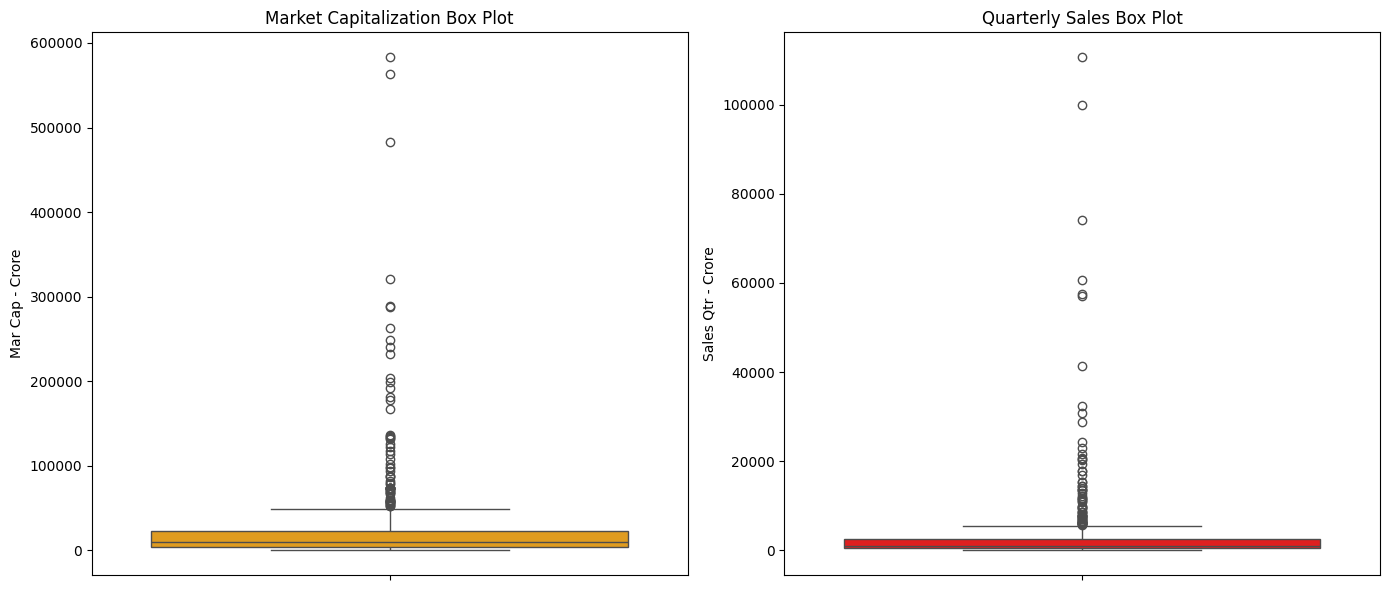

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Mar Cap - Crore'], color='orange')
plt.title('Market Capitalization Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Sales Qtr - Crore'], color='red')
plt.title('Quarterly Sales Box Plot')

plt.tight_layout()
plt.show()

- **Violin Plots:** To visualize the distribution and density of the data.

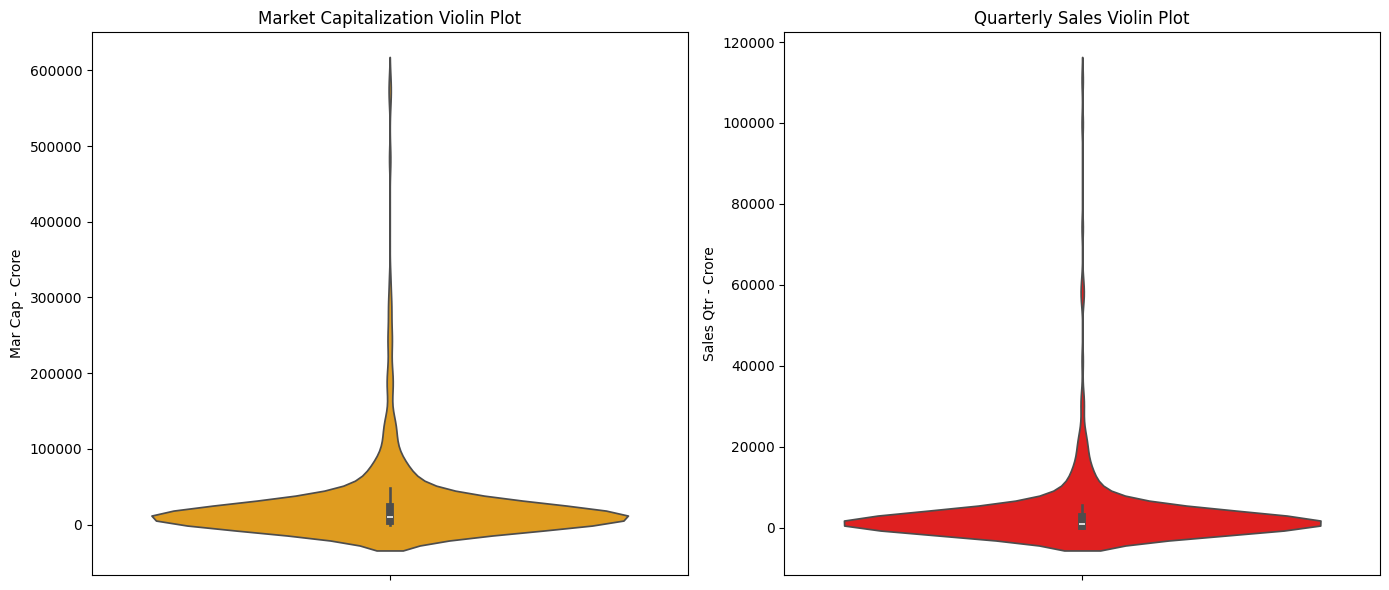

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.violinplot(y=data['Mar Cap - Crore'], color='orange')
plt.title('Market Capitalization Violin Plot')

plt.subplot(1, 2, 2)
sns.violinplot(y=data['Sales Qtr - Crore'], color='red')
plt.title('Quarterly Sales Violin Plot')

plt.tight_layout()
plt.show()

- **Scatter Plot with Regression Line:** To visualize the relationship between market capitalization and sales with a regression line.

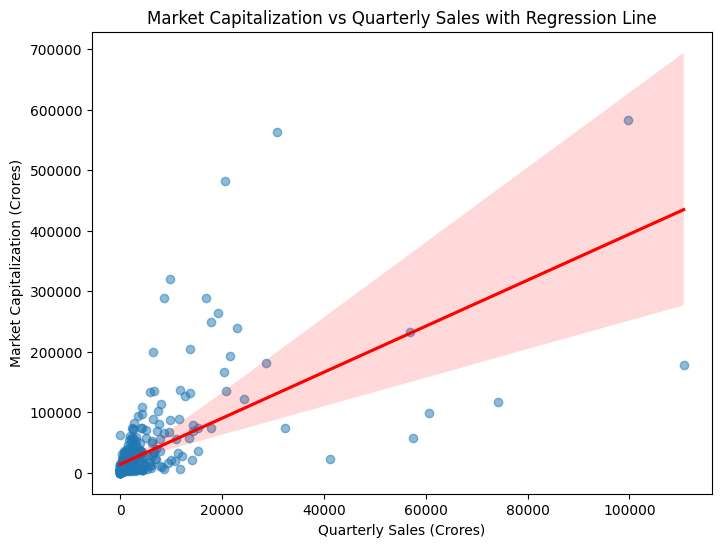

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Market Capitalization vs Quarterly Sales with Regression Line')
plt.xlabel('Quarterly Sales (Crores)')
plt.ylabel('Market Capitalization (Crores)')
plt.show()

- **Pie Chart:** To show the market share of the top companies by market capitalization.

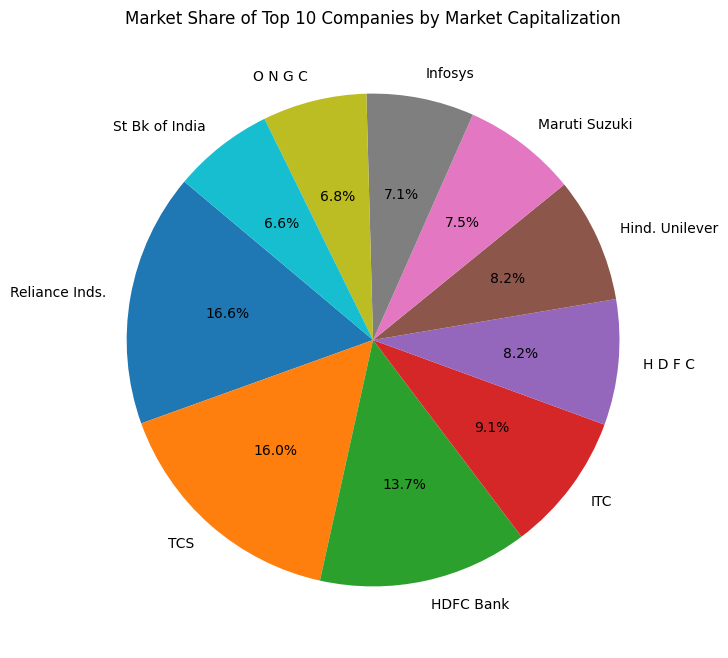

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_market_cap['Mar Cap - Crore'], labels=top_10_market_cap['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Companies by Market Capitalization')
plt.show()

###**Step 7: Feature Engineering**
- As no new features are being added in this step, we can skip this part.

In [ ]:
# Adding new features (log transformations)
data['Log_Mar_Cap'] = np.log1p(data['Mar Cap - Crore'])
data['Log_Sales_Qtr'] = np.log1p(data['Sales Qtr - Crore'])

###**Step 8: Data Storage using SQL**

- Store data in an SQLite database for efficient querying:

In [ ]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('financial_data.db')
data.to_sql('companies', conn, if_exists='replace', index=False)

# Querying the data
query = "SELECT * FROM companies WHERE `Mar Cap - Crore` > 100000"
df_query = pd.read_sql(query, conn)

###**Step 9: Machine Learning Model for Prediction**

- Linear regression model to predict market capitalization:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = data[['Sales Qtr - Crore']]
y = data['Mar Cap - Crore']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

###**Step 10: Visualization of Results**

- Visualize actual vs. predicted market capitalization using scatter plots and other relevant visualizations:

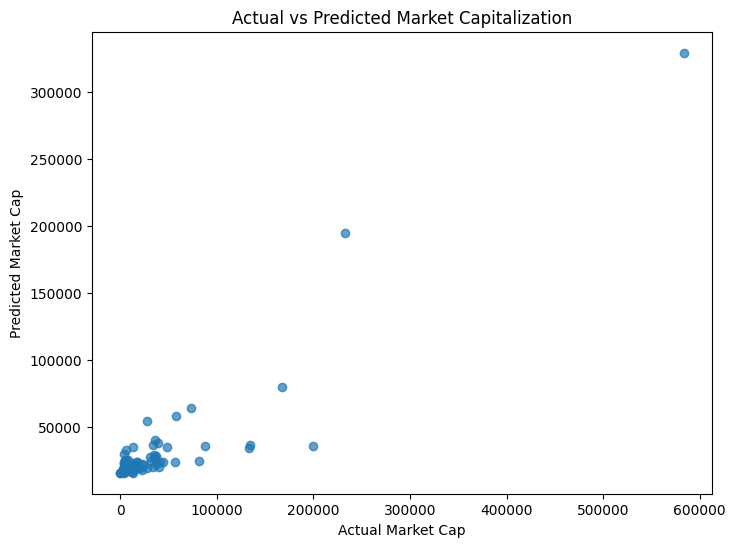

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Actual vs Predicted Market Capitalization')
plt.show()

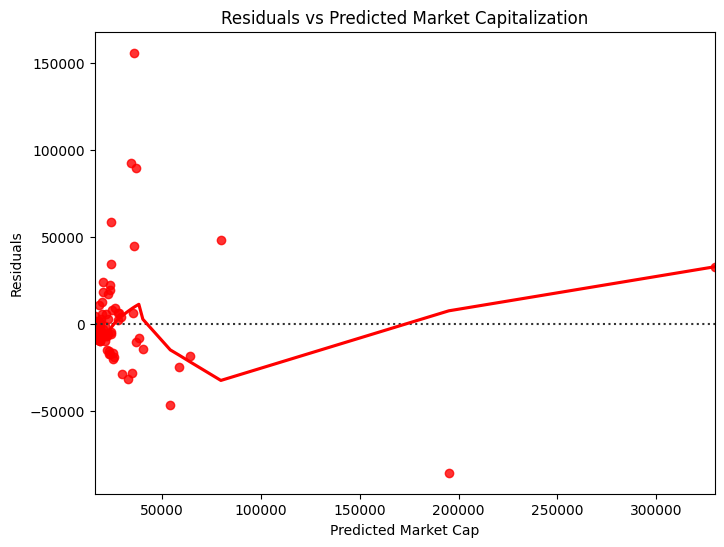

In [ ]:
# Residual plot to check the fit of the model
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='red')
plt.xlabel('Predicted Market Cap')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Market Capitalization')
plt.show()

###**Step 11: Conclusion**

- **Summary:** This project effectively utilized financial data analysis techniques, including EDA, SQL integration, machine learning modeling, and visualization, to predict market capitalization based on quarterly sales data.

- **Implications:** Insights gained can inform strategic decisions regarding market trends and company performance.

- **Future Work:** Potential future research could include exploring additional features or employing more advanced machine learning algorithms for improved prediction accuracy.

####***Thank Q, for your time!***